In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import numpy as np

from sklearn.cluster import KMeans



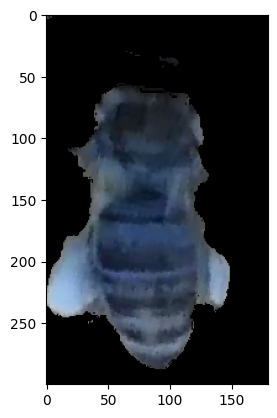

In [13]:
# flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
image = cv2.imread("image/P57962-142r.jpg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h_channel = hsv_image[:, :, 0]

# Xác định vùng màu H cần lọc
lower_hue = 0    # Ngưỡng dưới cho màu H
upper_hue = 30   # Ngưỡng trên cho màu H
hue_mask = cv2.inRange(h_channel, lower_hue, upper_hue)

# Áp dụng mask lên ảnh gốc
image = cv2.bitwise_and(image, image, mask=hue_mask)
plt.imshow(image)

In [12]:
# len(flags)

# flags[40]
image.shape


(54000, 3)

In [14]:
# X = image.reshape(-10,4)
# kmeans = KMeans(n_clusters=20, n_init=10)
# kmeans.fit(X)
# image.shape
x,y,z = image.shape

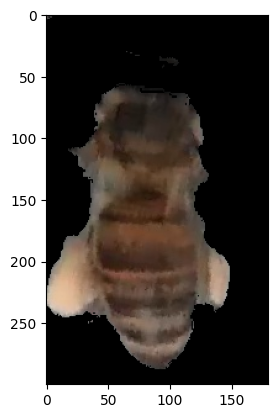

In [15]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


plt.imshow(image)

In [16]:
image = image.reshape(-1,3)
# kmeans = KMeans(n_clusters=20, n_init=10)
# kmeans.fit(X)
image.shape


(54000, 3)

In [17]:
dominant_color = 15
model = KMeans(dominant_color)
model.fit(image)

KMeans(n_clusters=15)

In [18]:
colors = model.cluster_centers_
colors = np.array(colors, dtype= "uint8")
colors

array([[  0,   0,   0],
       [ 86,  61,  44],
       [184, 158, 135],
       [ 98,  84,  73],
       [ 54,  39,  30],
       [159, 137, 118],
       [218, 186, 158],
       [135, 116, 102],
       [ 73,  48,  32],
       [106,  73,  53],
       [116,  91,  72],
       [ 84,  71,  62],
       [ 65,  53,  46],
       [ 37,  29,  24],
       [114, 102,  92]], dtype=uint8)

In [19]:
new_image= np.zeros((x*y,z), dtype="uint8")

In [20]:
for i in range(new_image.shape[0]):
    new_image[i] = colors[model.labels_[i]]

In [21]:
new_image = np.reshape(new_image,(x,y,z))

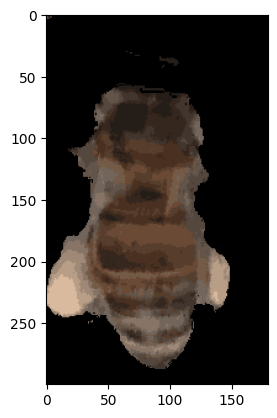

In [22]:
plt.imshow(new_image)

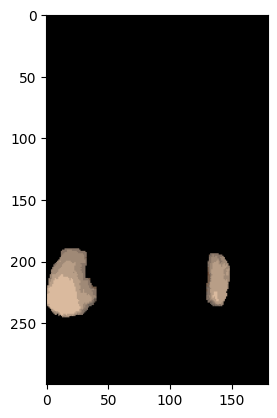

In [23]:
# hsv_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

# # Trích xuất kênh màu H (hue)
# h_channel = hsv_image[:, :, 2]

# # Hiển thị kênh màu H
# plt.imshow(h_channel, cmap='hsv')
# plt.colorbar()
# plt.show()
hsv_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

# Phân ngưỡng dựa trên kênh màu S (saturation)
threshold_value =150
_, threshold = cv2.threshold(hsv_image[:, :, 2], threshold_value, 170, cv2.THRESH_BINARY)

# Xử lý mờ (optional)
#threshold = cv2.GaussianBlur(threshold, (5, 5), 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
# Thực hiện phép toán đóng
closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# Thực hiện phép toán mở
opened_image = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Thực hiện phép giãn nở
dilated_image = cv2.dilate(opened_image, kernel, iterations=1)



# Áp dụng mask lên ảnh gốc để tách phần nền
background = cv2.bitwise_and(new_image,new_image, mask=dilated_image)

mask = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

# Tìm các contour trên mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lọc các contour theo diện tích
min_area =300
max_area = 4000  # Diện tích tối thiểu
filtered_contours = [cnt for cnt in contours if (min_area <cv2.contourArea(cnt)  )]

# Tạo ảnh đen với kích thước của mask
result = np.zeros_like(mask)

# Vẽ các contour lên ảnh đen
cv2.drawContours(result, filtered_contours, -1, (255), thickness=cv2.FILLED)

result_image = cv2.bitwise_and(background, background, mask=result)


plt.imshow(result_image)



In [24]:
# _, threshold = cv2.threshold(h_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# from skimage.metrics import structural_similarity as ssim

image1 = cv2.imread('./mask/P57962-142r.png')
# # # Chuyển đổi ảnh background và ảnh mask thành ảnh grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# _, binary = cv2.threshold(gray_background, 128, 255, cv2.THRESH_BINARY)
# plt.imshow(binary)
# gray_mask = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# # Tính toán sự tương đồng giữa ảnh background và ảnh mask
# similarity = ssim(gray_background, gray_mask)

# # Hiển thị sự tương đồng
# print("Similarity:", similarity)

In [25]:
# import numpy as np
from sklearn.metrics import confusion_matrix

# def compute_performance_metrics(true_labels, predicted_labels):
#     """
#     Tính toán các chỉ số đánh giá chất lượng phân vùng cho bài toán phân vùng semantik.
#     Args:
#         true_labels: Mảng numpy chứa nhãn thực tế của các pixel trong ảnh (1D array)
#         predicted_labels: Mảng numpy chứa nhãn dự đoán của các pixel trong ảnh (1D array)
#         num_classes: Số lượng lớp phân vùng
#     Returns:
#         accuracy, IoU (Intersection over Union), precision, recall
#     """
#     # Tính toán ma trận nhầm lẫn (confusion matrix)
#     cm = confusion_matrix(true_labels, predicted_labels)
#     print(cm)
#     # Tính toán tổng số lượng pixel trong mỗi lớp
#     class_counts = cm.sum(axis=1)

#     # Tính toán true positives (tp), false positives (fp) và false negatives (fn)
#     tp = np.diag(cm)
#     fp = cm.sum(axis=0) - tp
#     fn = cm.sum(axis=1) - tp

#     # Tính toán accuracy
#     accuracy = tp.sum() / cm.sum()

#     # Tính toán Intersection over Union (IoU)
#     intersection = tp
#     union = class_counts + cm.sum(axis=0) - tp
#     iou = intersection / union

#     # Tính toán precision
#     precision = tp / (tp + fp)

#     # Tính toán recall
#     recall = tp / (tp + fn)

#     return accuracy, iou, precision, recall

# # Example usage
# true_labels = np.array([[1,0,1], [1,0,0], [1,2,0]])
# predicted_labels = np.array([[1,0,1], [1,1,1], [1,2,0]])
# gray_back1 = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
# print(gray_image1.flatten())
# accuracy, iou, precision, recall = compute_performance_metrics( gray_image1.flatten(), gray_back1.flatten() )
# print("Accuracy:", accuracy)
# print("IoU:", iou)
# print("Precision:", precision)
# print("Recall:", recall)
result_gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)

# Tính toán Confusion Matrix
TP = np.count_nonzero(np.logical_and(result_gray,gray_image1))
TN = np.count_nonzero(np.logical_and(np.logical_not(result_gray), np.logical_not(gray_image1)))
FP = np.count_nonzero(np.logical_and(np.logical_not(result_gray), gray_image1))
FN = np.count_nonzero(np.logical_and(result_gray, np.logical_not(gray_image1)))


# In ra Confusion Matrix
print("Confusion Matrix:")
print("True Positive:", TP)
print("True Negative:", TN)
print("False Positive:", FP)
print("False Negative:", FN)

# Tính toán Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Kiểm tra nếu TP và FN đều bằng 0
if TP == 0 and FP == 0:
    precision = 0
else:
    precision = TP / (TP + FP)



# Kiểm tra nếu TP và FN đều bằng 0
if TP == 0 and FN == 0:
    recall = 0
else:
    # Tính toán Recall
    recall = TP / (TP + FN)


if recall == 0 and precision == 0:
    f1_score = 0
else:
    # Tính toán F1-score
    f1_score = 2 * (precision * recall) / (precision + recall)

# In ra các chỉ số đánh giá
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)



Confusion Matrix:
True Positive: 2176
True Negative: 51184
False Positive: 451
False Negative: 189
Accuracy: 0.9881481481481481
Precision: 0.8283212790255043
Recall: 0.9200845665961945
F1-score: 0.8717948717948718


In [27]:
import pandas as pd

# Tạo DataFrame cho Precision và Recall
evaluation_data = {
    'Precision': [precision],
    'Recall': [recall]
}

df_evaluation = pd.DataFrame(evaluation_data)

# Ghi DataFrame vào file Excel
with pd.ExcelWriter('evaluation_results.xlsx') as writer:
    df_evaluation.to_excel(writer, sheet_name='Evaluation', index=False)

Confusion Matrix:
[[51184   189]
 [  451  2176]]


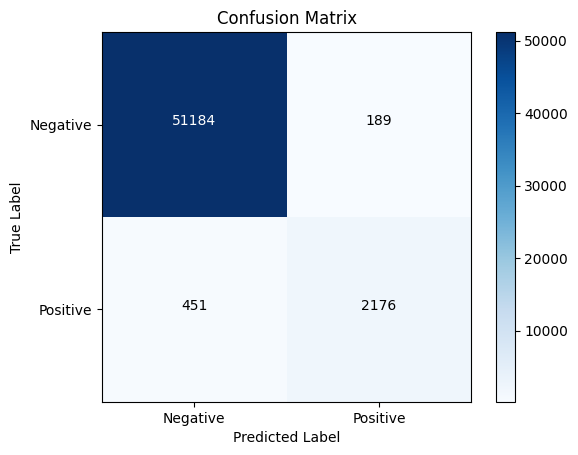

In [28]:
# # # Đọc ảnh nhãn thực tế và ảnh dự đoán
# # image_true = cv2.imread(result_gray, cv2.IMREAD_GRAYSCALE)
# # image_pred = cv2.imread(gray_image1, cv2.IMREAD_GRAYSCALE)

# # # Áp dụng phân ngưỡng để tạo nhãn binary từ ảnh
# # threshold_value = 127
# # _, binary_true = cv2.threshold(result_gray, threshold_value, 255, cv2.THRESH_BINARY)
# # _, binary_pred = cv2.threshold(gray_image1, threshold_value, 255, cv2.THRESH_BINARY)

# # Chuyển đổi kiểu dữ liệu thành numpy array
# y_true = np.asarray(result_gray).flatten()
# y_pred = np.asarray(gray_image1).flatten()

# # Tính toán Confusion Matrix
# cm = confusion_matrix(y_true, y_pred)

# # In ra Confusion Matrix
# print("Confusion Matrix:")
# print(cm)


# labels = ["Negative", "Positive"]
# plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.colorbar()
# tick_marks = np.arange(len(labels))
# plt.xticks(tick_marks, labels)
# plt.yticks(tick_marks, labels)
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# for i in range(len(labels)):
#     for j in range(len(labels)):
#         plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
# plt.show()
# # from skimage.metrics import structural_similarity as ssim

# # def compare_images(image1_path, image2_path):
# #     # Đọc ảnh từ đường dẫn
# #     image1 = cv2.imread(image1_path)
# #     image2 = cv2.imread(image2_path)

# #     # Chuyển đổi ảnh sang định dạng gray (ảnh xám)
# #print(background)

# #     gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# #     # Tính toán độ tương đồng giữa hai ảnh sử dụng chỉ số SSIM (Structural Similarity Index)
# #     ssim_score = ssim(gray_image1, gray_image2)

# #     return ssim_score

# # # Đường dẫn của hai ảnh cần so sánh
# # image1_path = './image/P268-2r.jpg'
# # image2_path = './image/P268-2r.png'
# # # Gọi hàm để so sánh độ tương đồng giữa hai ảnh
# # similarity_score = compare_images(image1_path, image2_path)

# # print("Similarity score:", similarity_score)
y_true = np.asarray(gray_image1).flatten()
y_pred = np.asarray(result_gray).flatten()
y_true[y_true > 1] = 1
y_pred[y_pred > 1] = 1

np.set_printoptions(threshold=np.inf)


# Tính toán Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# In ra Confusion Matrix
print("Confusion Matrix:")
print(cm)

labels = ["Negative", "Positive"]
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Hiển thị giá trị trên từng ô trong Confusion Matrix
thresh = cm.max() / 2
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [29]:
# import numpy as np

# def convert_image_to_binary(image, threshold):
#     """
#     Chuyển đổi ma trận ảnh màu thành ma trận ảnh chỉ chứa 0 và 1 bằng cách áp dụng ngưỡng (thresholding).
#     Args:
#         image: Mảng numpy chứa ma trận ảnh màu (3D array - chiều cuối cùng là kênh màu RGB)
#         threshold: Ngưỡng để quyết định giá trị nào sẽ được chuyển thành 0 và giá trị nào sẽ được chuyển thành 1
#     Returns:
#         Mảng numpy chứa ma trận ảnh chỉ chứa 0 và 1 (2D array)
#     """
#     # Chuyển đổi ảnh màu thành ảnh xám (grayscale)
#     gray_image = np.mean(image, axis=2)

#     # Áp dụng ngưỡng để chuyển đổi thành ảnh chỉ có 0 và 1
#     binary_image = np.where(gray_image > threshold, 1, 0)

#     return binary_image

# # Example usage
# image = np.array([
#     [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
#     [[0, 255, 0], [255, 0, 0], [0, 0, 255]],
#     [[0, 0, 255], [0, 255, 0], [255, 0, 0]]
# ], dtype=np.uint8)

# threshold = 127

# binary_image = convert_image_to_binary(gray_image1, gray_image1)
# print("Binary Image:")
# print(binary_image)


In [1172]:
# mask = np.zeros_like(image)
# cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

In [1173]:
# segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# segmented_img = segmented_img.reshape(image.shape)

In [1174]:
# plt.imshow(segmented_img/255)

In [1175]:
# hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
# import cv2

In [1176]:
# h, s, v = cv2.split(hsv_nemo)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()